In [4]:
import noise
import numpy as np
import random

width = 256
height = 256
scale = 100.0
octaves = 6
persistence = 0.5
lacunarity = 2.5
base = 0
    
def generate_noise(width=width, height=height, scale=scale, octaves=octaves,
                   persistence=persistence, lacunarity=lacunarity, base=base):
    noise_map = np.zeros((width, height))
    for i in range(width):
        for j in range(height):
            noise_map[i][j] = noise.pnoise2(i/scale, j/scale, 
                                        octaves=octaves, 
                                        persistence=persistence, 
                                        lacunarity=lacunarity, 
                                        repeatx=1024, 
                                        repeaty=1024, 
                                        base=base)
    return noise_map

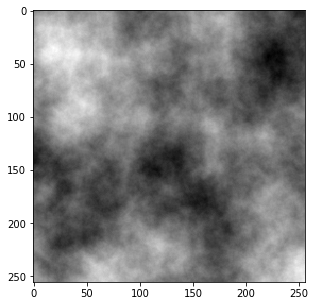

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline

world = generate_noise(base=random.randint(0, 100))
#world = np.random.rand(200,200)

plt.figure(figsize=(10,5))
plt.imshow(world, cmap='gray')
plt.show()

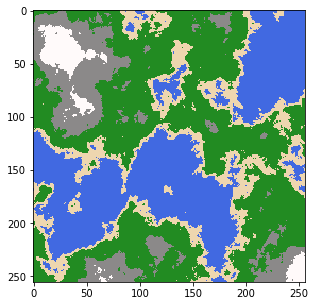

In [6]:
blue = [65, 105, 225]
green = [34, 139, 34]
beach = [238, 214, 175]
snow = [255, 250, 250]
mountain = [139, 137, 137]

def set_terrain(world):
    color_world = np.zeros(world.shape+(3,)).astype(int)
    for i in range(width):
        for j in range(height):
            if world[i][j] < -0.06:
                color_world[i][j] = blue
            elif world[i][j] < 0:
                color_world[i][j] = beach
            elif world[i][j] < 0.2:
                color_world[i][j] = green
            elif world[i][j] < 0.35:
                color_world[i][j] = mountain
            elif world[i][j] < 1.4:
                color_world[i][j] = snow
                
    return color_world


color_world = set_terrain(world)

plt.figure(figsize=(10,5))
plt.imshow(color_world)
plt.savefig('map.png')
plt.show()